# Solution for double pendulum

In [3]:
import numpy as np
from scipy.integrate import odeint

In [4]:
g = 10.
beta = 0.1 #  some frition in the hinges; beta = 0. -> no friction
def pendulum(phi, t):
    phi1, phi2, phi3, phi4 = phi
    A = np.array([[4/3, .5*np.cos(phi1-phi2)],
                  [.5*np.cos(phi1-phi2), 1/3]])
    b = np.array([-.5*phi4**2*np.sin(phi1-phi2)-3/2*g*np.sin(phi1),
                  .5*phi3**2*np.sin(phi1-phi2)-.5*g*np.sin(phi2)])
    dphi = np.linalg.solve(A, b)
    return np.array([phi3, phi4, dphi[0]- beta*phi3, dphi[1]- beta*phi4])

In [5]:
phi0 = np.array([np.pi/2, 0, 0., 0.])
t = np.linspace(0, 30., 3000)

phi_t = odeint(pendulum, phi0, t)

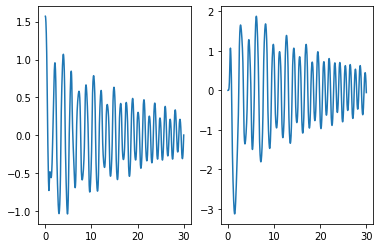

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

ax = plt.subplot(1,2,1)
ax.plot(t, phi_t[:,0])
ax2 = plt.subplot(1,2,2)
ax2.plot(t, phi_t[:,1])
plt.show()

In [7]:
def compute_xy(phi_t):
    x1 = np.sin(phi_t[:,0])
    y1 = -np.cos(phi_t[:,0])
    x2 = x1 + np.sin(phi_t[:,1])
    y2 = y1 - np.cos(phi_t[:,1])
    return x1, y1, x2, y2

x1, y1, x2, y2 = compute_xy(phi_t)

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure(); ax = plt.subplot(111, aspect="equal")
ln1, ln2 = ax.plot([],[]) + ax.plot([],[])
ln3, = ax.plot([0,x1[0],x2[0]], [0,y1[0],y2[0]], 'ko-', lw=5)

def init():
    ax.set_xlim(-2.1, 2.1)
    ax.set_ylim(-2.1, 1.1)
    return ln1, ln2, ln3

def update(frame):
    ln1.set_data(x1[:frame+1], y1[:frame+1])
    ln2.set_data(x2[:frame+1], y2[:frame+1])
    ln3.set_data([0,x1[frame],x2[frame]], [0,y1[frame],y2[frame]])
    return ln1, ln2, ln3
    
ani = FuncAnimation(fig, update, frames=range(len(x1)), cache_frame_data=False,
                    init_func=init, interval=3, blit=True)

plt.show(ani)

<IPython.core.display.Javascript object>